# Задание №5. Модель взаимодействия двух конкурирующих видов.

### Импорт модулей

In [1]:
from typing import Callable, Tuple
import matplotlib.pyplot as plt

%matplotlib inline

### Метод Рунге-Кутта

In [2]:
def runge_kutta(fs: Tuple[Callable], n: int, h: float, t: float, x: float, y: float) -> Tuple[float, float, float]:
    """ Численный метод решения систем обыкновенных дифференциальных уравнений методом Рунге-Кутта
    
        :param fs: кортеж из первого и второго уравнений
        :type fs: Tuple[Callable]
        :param n: количество итераций (дней)
        :type n: int
        :param h: шаг
        :type h: float
        :param t: начальная точка `t`
        :type t: float
        :param x: начальная точка `x`
        :type x: float
        :param y: начальная точка `y`
        :type y: float
        
        :return: решение ДУ
        :rtype: Tuple[float, float, float]
    """
    def k(k1, k2, k3, k4):
            return (k1 + 2*k2 + 2*k3 + k4)/6
    for _ in range(n):
        k11, k21 = map(lambda f: h * f(t, x, y), fs)
        k12, k22 = map(lambda f: h * f(t + h/2, x + k11/2, y + k21/2), fs)
        k13, k23 = map(lambda f: h * f(t + h/2, x + k12/2, y + k22/2), fs)
        k14, k24 = map(lambda f: h * f(t + h,   x + k13,   y + k23),   fs)
        k1, k2 = k(k11, k12, k13, k14), k(k21, k22, k23, k24)
        t, x, y = t + h, x + k1, y + k2
    return t, x, y

In [3]:
def f1(t, x, y, *, a1=20, b11=5, b12=2):
    return a1*x-b11*x**2-b12*x*y

In [4]:
def f2(t, x, y, *, a2=18, b21=3, b22=5):
    return a2*y-b21*x*y-b22*y**2

In [5]:
runge_kutta((f1, f2), 601, 0.01, 0, 5, 6)

(6.009999999999916, 3.3684210526315623, 1.5789473684210813)

### Визуализация

In [6]:
x1_points, x2_points = [], []
for i in range(1000):
    res = runge_kutta((f1, f2), i, 0.01, 0, 5, 6)
    x1_points.append(res[1])
    x2_points.append(res[2])

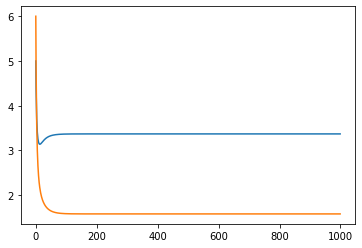

In [7]:
plt.plot(x1_points)
plt.plot(x2_points)